In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1

* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

### 1.1. Скачать данные в закрепе к уроку

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<span style='color:red'>Продолжаем работу с известным нам датафреймом по недвижимости</span>

### 1.2 Изучите стоимости недвижимости

In [4]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

<span style='color:red'>Количество разных значений больше 4000, поэтому в построении график буду брать bins=400, цвет - зеленый</span>

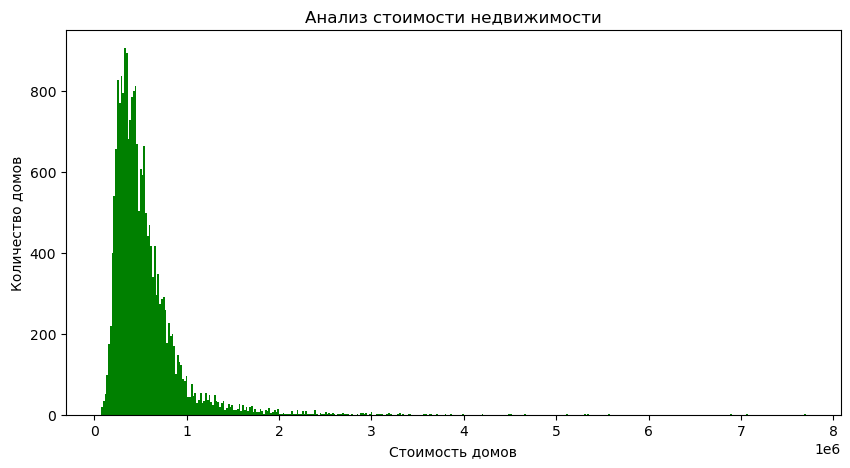

In [5]:
plt.figure(figsize=(10,5))
plt.hist(df['price'], bins=400, color='g')
plt.title('Анализ стоимости недвижимости')
plt.xlabel('Стоимость домов')
plt.ylabel('Количество домов');

<span style='color:red'>По графику видно, что большая часть домов лежит в пределах до 1 000 000 у.е. (Почти как з/п у одного единственного сеньора в России)</span>

### 1.3 Изучите распределение квадратуры жилой

In [6]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

<span style='color:red'> По таблице у нас больше 100 значений, возьму bins=100 </span>

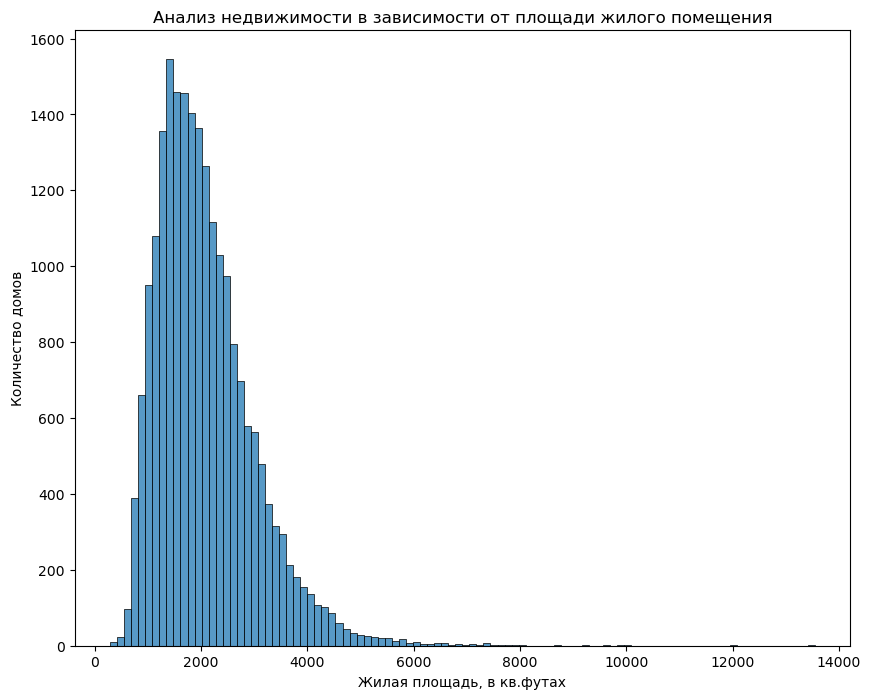

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Анализ недвижимости в зависимости от площади жилого помещения')
plt.xlabel('Жилая площадь, в кв.футах')
plt.ylabel('Количество домов');

<span style='color:red'>Основная часть домов имеет жилую площадт от 1000 до 3000 кв.футов, что примерно 92-280 кв.м.. Нормальные такие домики))</span>

### 1.4 Изучите распределение года постройки

In [8]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

<span style='color:red'>Кол-во значений годов постройки: 116. Для постройки графика объединим значения по 5 лет и возьмем bins=23</span>

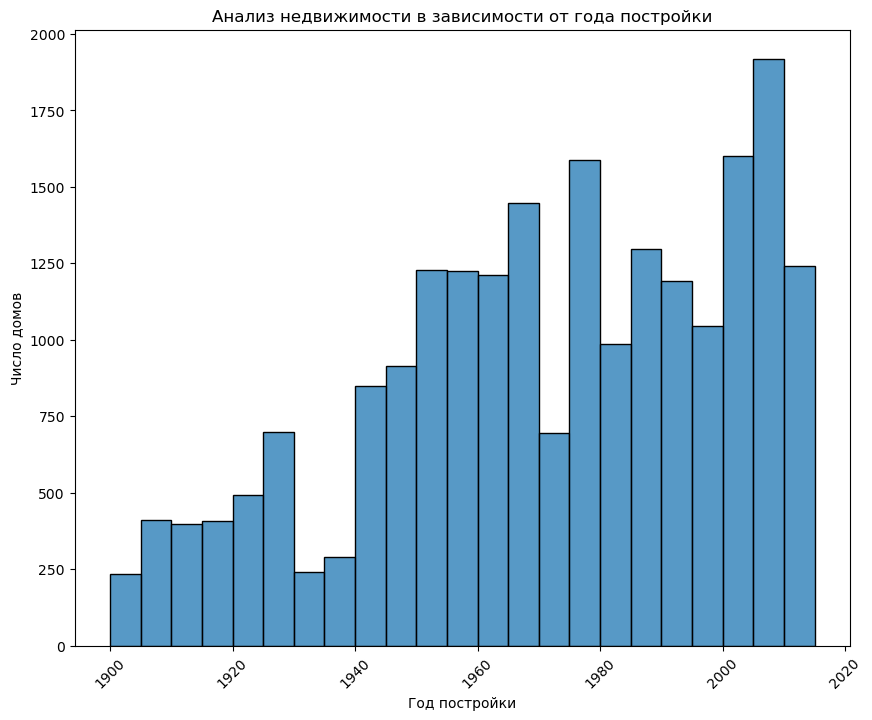

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(df['yr_built'], bins=23)
plt.title('Анализ недвижимости в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Число домов')
plt.xticks(rotation=45);

<span style='color:red'>Как мы видим по графику, большая часть домов имеет возраст до 70 лет, но достаточно много и тех, которые старше</span>

## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [10]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

<span style='color:red'>Ожидаемо порлучаем два значения. Вид либо есть, либо его нет</span>

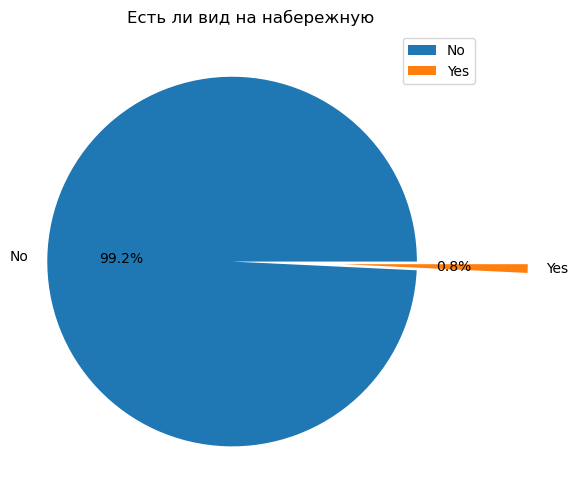

In [11]:
plt.figure(figsize=(6,6))
expl = [0.1, 0.5]
plt.pie(data, autopct='%1.1f%%', labels=['No', 'Yes'], explode=expl)
plt.title('Есть ли вид на набережную')
plt.legend(['No', 'Yes'], loc='best');

<span style='color:red'>Около 1% домов имеет возможность любоваться красивыми видами набережной</span>

### 2.2 Изучите распределение этажей домов

In [12]:
data1 = df['floors'].value_counts()
data1

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

<span style='color:red'>Получаем 6 значений и составляем barplot</span>

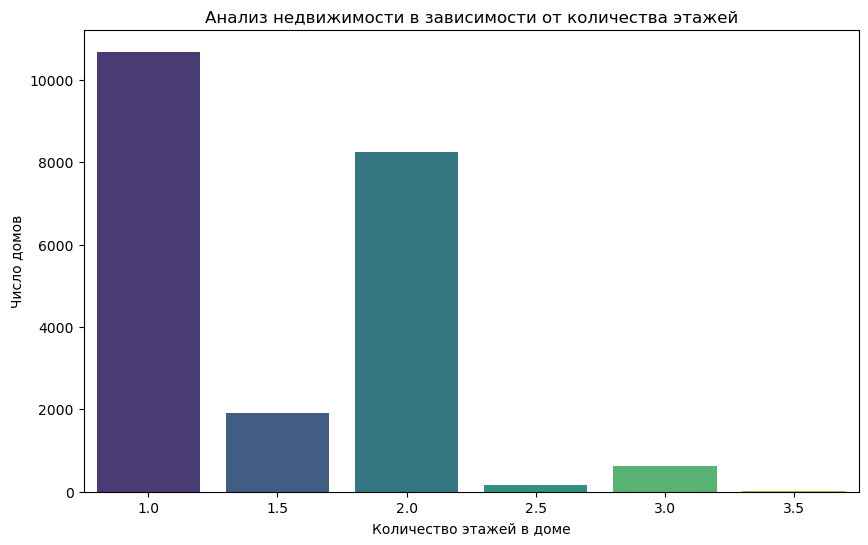

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=data1.index, y=data1.values, palette='viridis')
plt.title('Анализ недвижимости в зависимости от количества этажей')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Число домов');

<span style='color:red'>Чаще всего встречаются однеоэтажные и двухэтажные дома</span>

### 2.2 Изучите распределение состояния домов

In [14]:
data3 = df['condition'].value_counts()
data3

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

<span style='color:red'>Оценка домов проводится по 5-балльной системе</span>

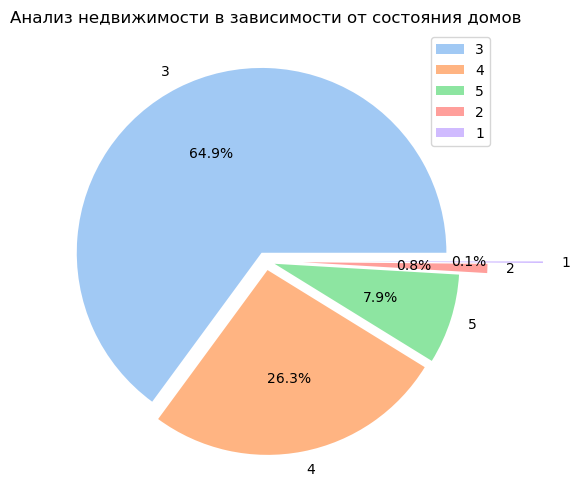

In [15]:
plt.figure(figsize=(6,6))
expl=[0.05, 0.05, 0.05, 0.2, 0.5]
col = sns.color_palette('pastel')
plt.pie(data3.values, autopct='%1.1f%%', labels=data3.index, explode=expl, colors=col)
plt.title('Анализ недвижимости в зависимости от состояния домов')
plt.legend(data3.index, loc='best');

<span style='color:red'>По графику очень хорошо видно, что большая часть домов имеет оценку "3"</span>

## Задача 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

<span style='color:red'> Сделаю несколько предположений, а потом их проанализирую:</span>
1. Цена за недвижимость зависит от площади жилья
2. Цена за недвижимость зависит от жилой площади
3. Цена за недвижимость зависит от состоянии жилого помещения
4. Цена за недвижимость зависит от возраста дома (года постройки)
5. Цена за недвижимость зависит от вида
6. Цена за недвижимость зависит от оценки дома

<span style='color:red'>Чтобы проверить свои догадки, построю матрицу корреляции и ее тепловую карту</span>

In [16]:
corr_matrix = df.corr()

In [17]:
corr_matrix = np.round(corr_matrix, 2)

In [18]:
corr_matrix[np.abs(corr_matrix)<=0.2] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
price,0.0,1.00,0.31,0.53,0.70,0.00,0.26,0.27,0.40,0.00,0.67,0.61,0.32,0.00,0.00,0.00,0.31,0.00,0.59,0.00
bedrooms,0.0,0.31,1.00,0.52,0.58,0.00,0.00,0.00,0.00,0.00,0.36,0.48,0.30,0.00,0.00,0.00,0.00,0.00,0.39,0.00
bathrooms,0.0,0.53,0.52,1.00,0.75,0.00,0.50,0.00,0.00,0.00,0.66,0.69,0.28,0.51,0.00,0.00,0.00,0.22,0.57,0.00
sqft_living,0.0,0.70,0.58,0.75,1.00,0.00,0.35,0.00,0.28,0.00,0.76,0.88,0.44,0.32,0.00,0.00,0.00,0.24,0.76,0.00
sqft_lot,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.72
floors,0.0,0.26,0.00,0.50,0.35,0.00,1.00,0.00,0.00,-0.26,0.46,0.52,-0.25,0.49,0.00,0.00,0.00,0.00,0.28,0.00
waterfront,0.0,0.27,0.00,0.00,0.00,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.0,0.40,0.00,0.00,0.28,0.00,0.00,0.40,1.00,0.00,0.25,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.28,0.00
condition,0.0,0.00,0.00,0.00,0.00,0.00,-0.26,0.00,0.00,1.00,0.00,0.00,0.00,-0.36,0.00,0.00,0.00,0.00,0.00,0.00


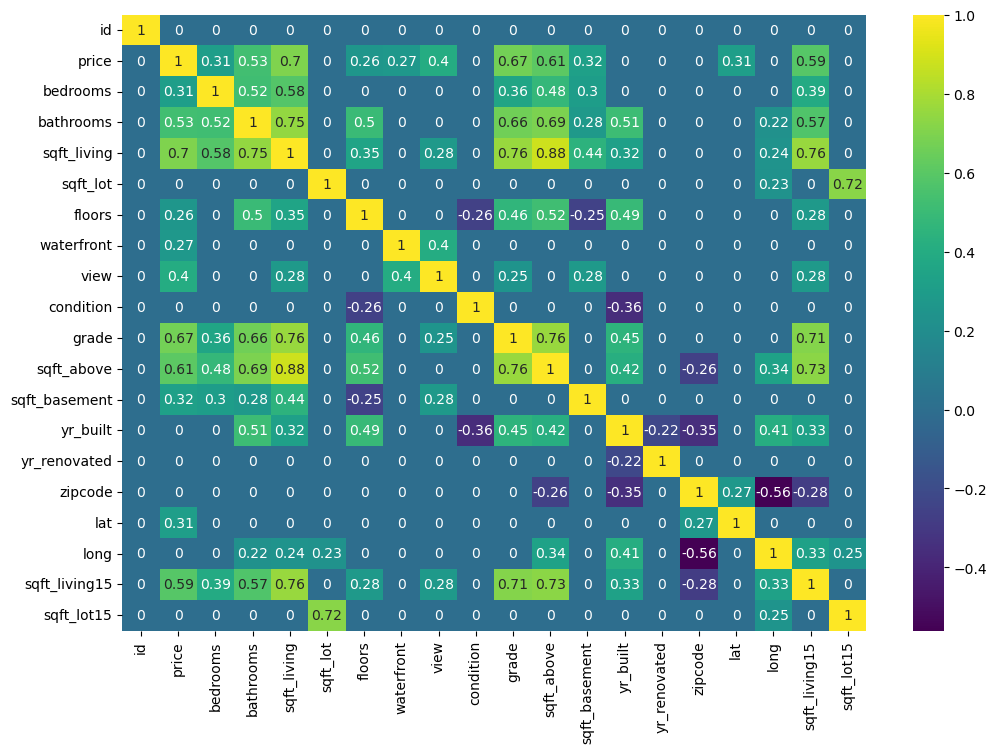

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis');

#### 1. Цена за недвижимость  зависит от площади жилья.

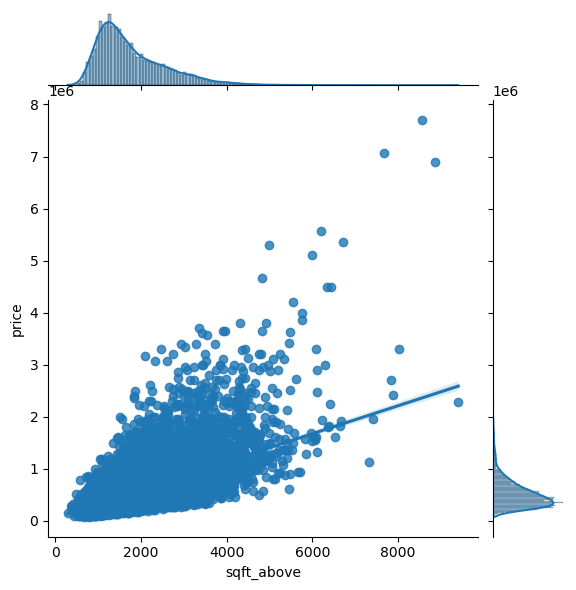

In [20]:
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg');

<span style='color:red'>По тепловой карте коэф.корреляции(КК) = 0,6 - средняя линейная связь, что подтверждается графиком. Я бы сделал вывод, что прямая зависимость есть, но на уровне 2млн по цене и 4000 кв.футов по площади </span>

#### 2.Цена за недвижимость зависит от жилой площади

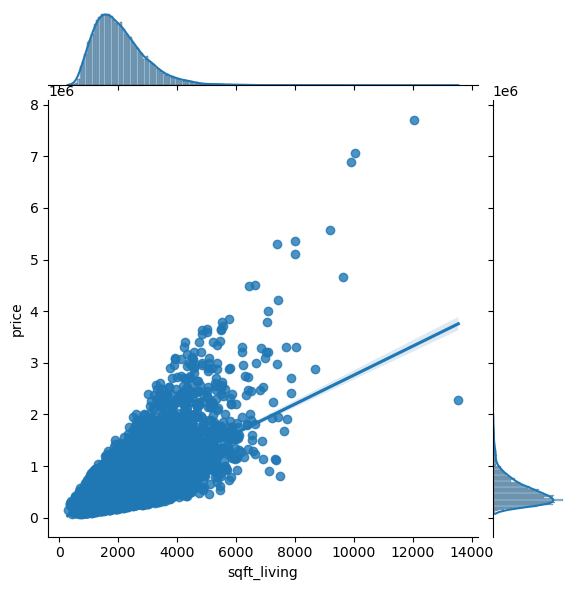

In [21]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

<span style='color:red'>Логично было предположить, что результаты будут похожими на предыдущий "опыт". По тепловой карте КК=0,7. По графику видно, что присутствует высокая линейная зависимость</span>

#### 3.Цена за недвижимость зависит от состояния жилого помещения

In [22]:

# sns.boxplot(y=df['condition'].astype('str').sort_values(), x=df['price']);

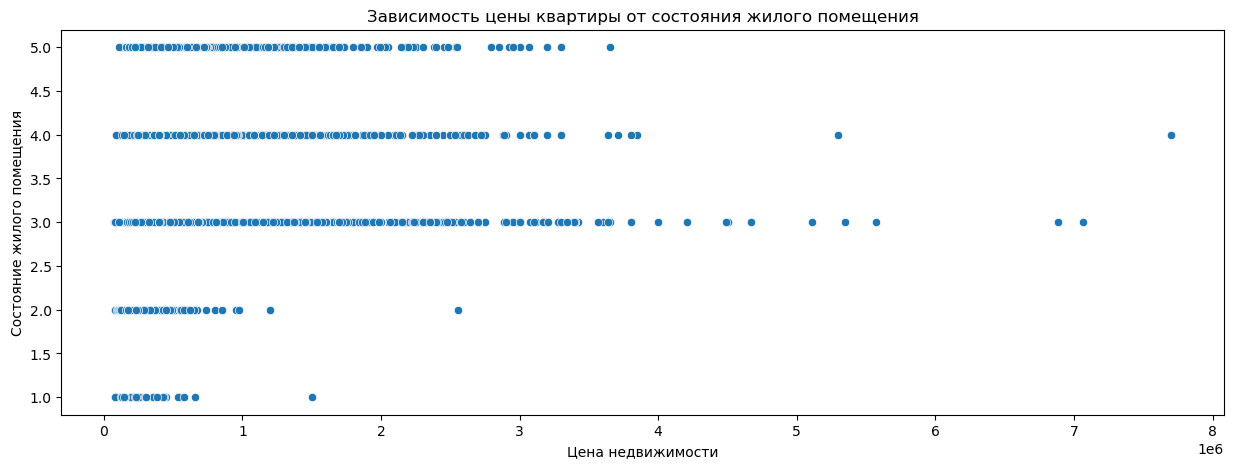

In [23]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['price'], y=df['condition'])
plt.title('Зависимость цены квартиры от состояния жилого помещения')
plt.xlabel('Цена недвижимости')
plt.ylabel('Состояние жилого помещения');

<span style='color:red'>По тепловой карте КК=0, по графику тоже видно, что линейная зависимость отсутствует. По непонятным причинам самая высокая стоимость домов с оценкой "3"</span>

#### 4.Цена за недвижимость зависит от возраста дома (года постройки)

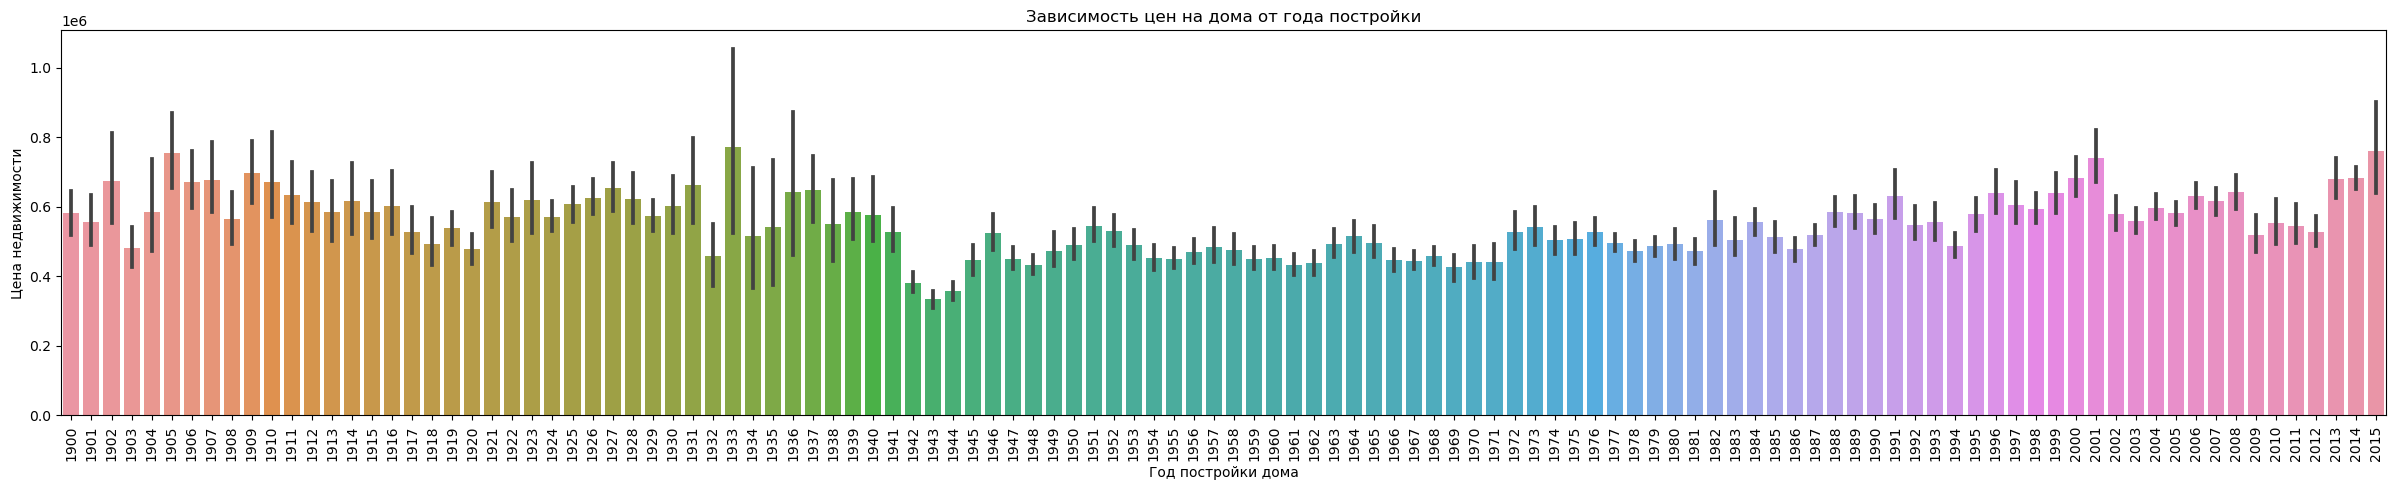

In [24]:
plt.figure(figsize=(30,5))
sns.barplot(x=df['yr_built'], y=df['price'])
plt.title('Зависимость цен на дома от года постройки')
plt.xlabel('Год постройки дома')
plt.ylabel('Цена недвижимости')
plt.xticks(rotation=90);

<span style='color:red'>По графику видно, что линейной зависимости между ценой на дом и годом постройки нет, что и подтверждает КК=0. </span>

#### 5.Цена за недвижимость прямопорционально зависит от вида 

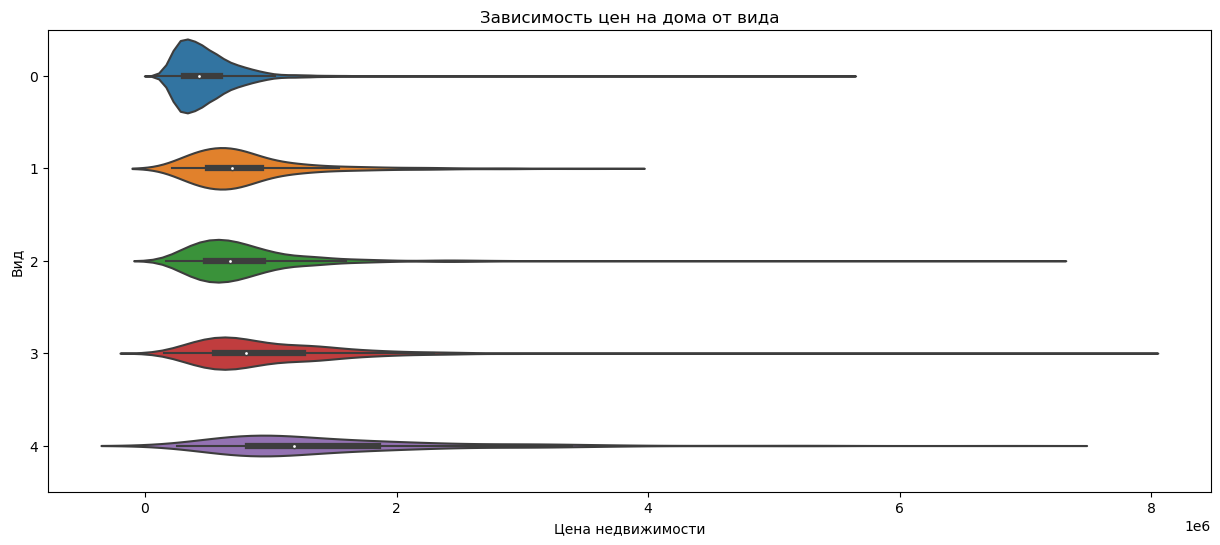

In [25]:
plt.figure(figsize=(15,6))
sns.violinplot(x=df['price'], y=df['view'].astype('str').sort_values())
# используем метод astype(str) для перевода признака 'view' в категориальный
plt.title('Зависимость цен на дома от вида')
plt.xlabel('Цена недвижимости')
plt.ylabel('Вид');

<span style='color:red'>По грфику видна небольшая линейная линейная зависимость (КК=0,4). Если убрать выбросы и смотреть по медианам линейная зависимость будет выше</span>

#### 6.Цена за недвижимость прямопорционально зависит от оценки дома

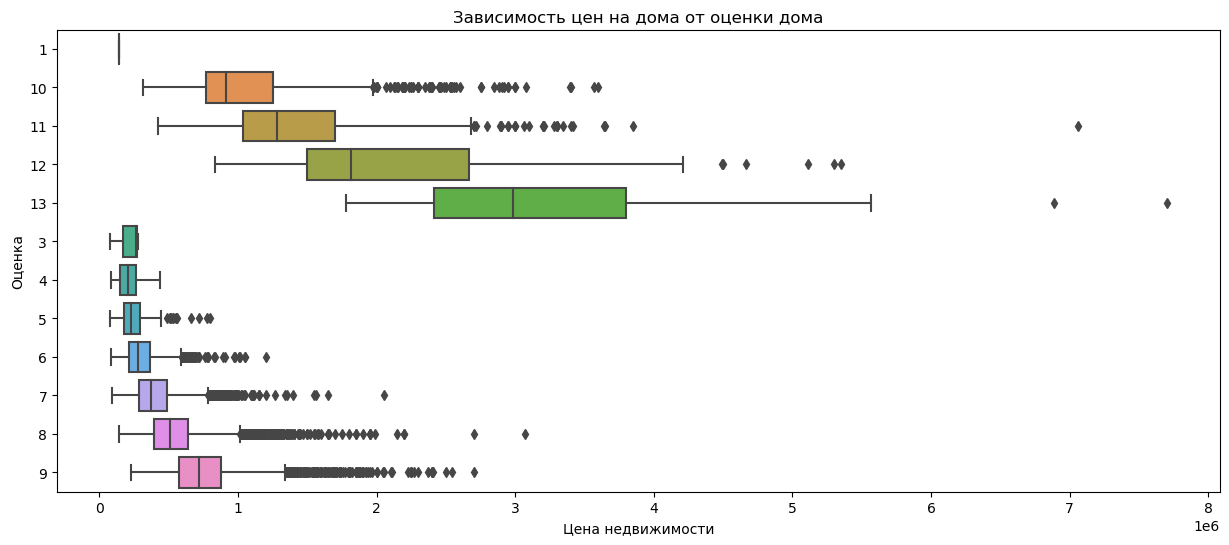

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['price'], y=df['grade'].astype(str).sort_values())
plt.title('Зависимость цен на дома от оценки дома')
plt.xlabel('Цена недвижимости')
plt.ylabel('Оценка');

<span style='color:red'>По этому графику видно, что чем больше оценка, тем выше цена дома. По тепловой карте КК=0,67 (заметная линейная зависимость), но визуально ее на графике не видно из-за неудачной сортировка. Построим joinplot, чтобы убедиться, что зависимость есть</span>

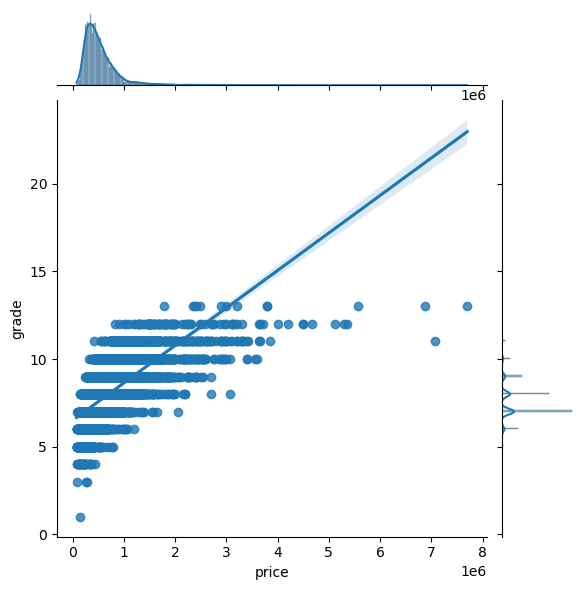

In [27]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

<span style='color:red'>Теперь визуально видно, что зависимость линейна</span>

#### <span style='color:red'>Общий вывод:</span>

<span style='color:red'>Зависимость одного параметра от другого лучше смотреть по коэффициенту корреляции, т.к. на графике не всегда эта зависимость видна. В нашем случае на цену недвижимости влияют: площадь дома(общая и жилая), кол-во комнат (тоже зависит от площади), оценка дома и вид (включая наличие набережной)</span>